In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [24]:
df = pd.read_csv('super_store_Data.csv',encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [25]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [26]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [27]:
df.shape

(9994, 21)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [29]:
num = df.select_dtypes(include=[int,float]).columns
num

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

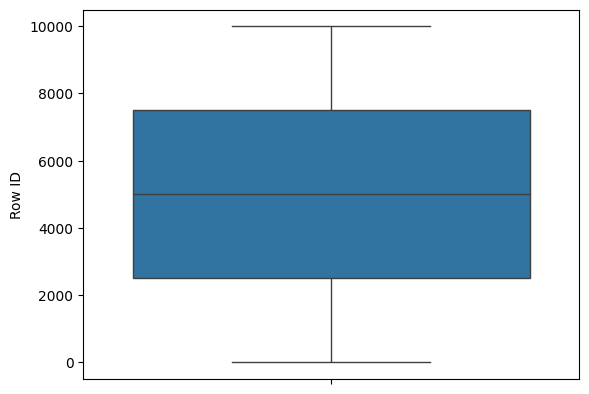

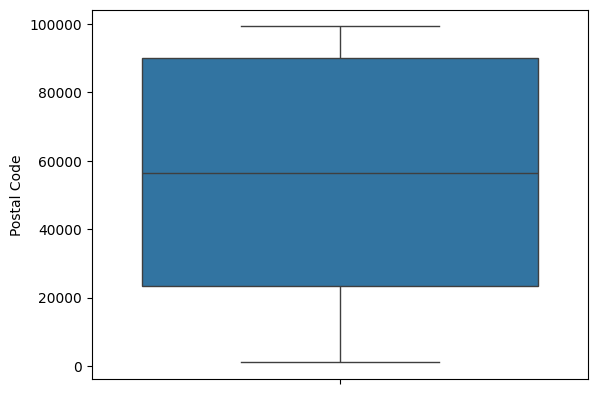

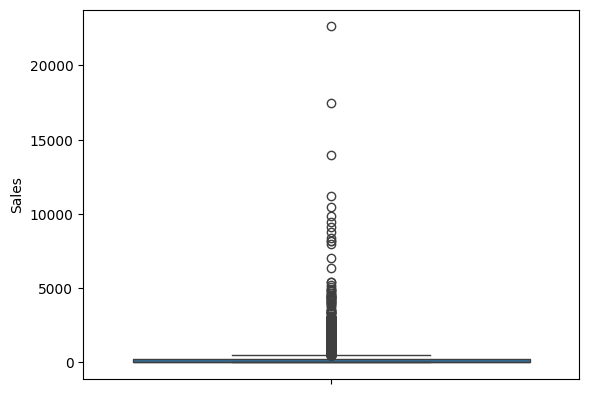

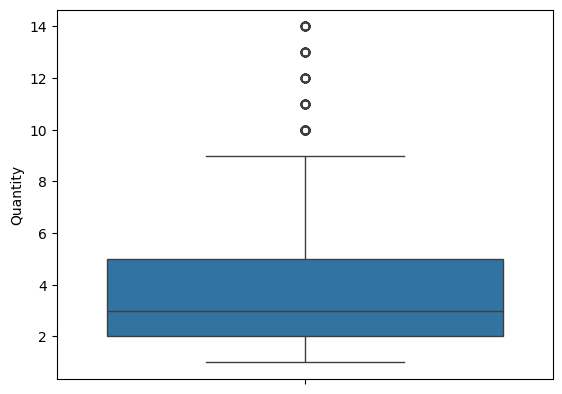

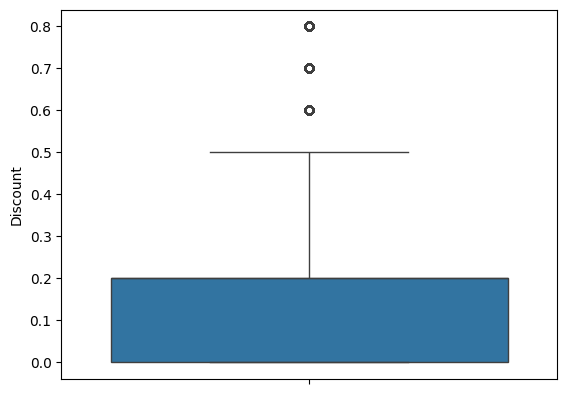

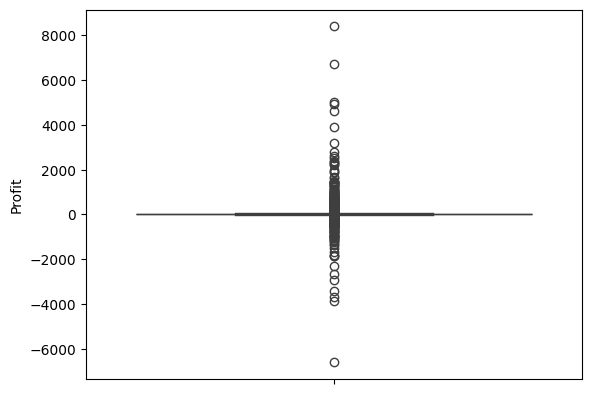

In [30]:
for i in num:
    plt.figure()
    sns.boxplot(df[i])
    plt.show()

In [31]:
num = ['Sales', 'Quantity', 'Discount', 'Profit']

from scipy import stats

zscore = np.abs(stats.zscore(df[num]))
zscore

,Sales,Quantity,Discount,Profit
0,0.051510,0.804303,0.756643,0.056593
1,0.805633,0.354865,0.756643,0.815054
2,0.345368,0.804303,0.756643,0.093002
3,1.167688,0.544012,1.423149,1.757484
4,0.332935,0.804303,0.212153,0.111593
...,...,...,...,...
9989,0.328314,0.354865,0.212153,0.104821
9990,0.221269,0.804303,0.756643,0.055598
9991,0.046080,0.804303,0.212153,0.039546
9992,0.321331,0.094574,0.756643,0.065473


In [32]:
th = 3
df1 = df[(zscore<th).all(axis=1)]
df1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21-01-2014,23-01-2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [33]:
df1.shape

(9436, 21)

In [34]:
#1. What was the total sales amount for each month

import datetime as dt

df1['Order Date'] = pd.to_datetime(df1['Order Date'])

df1['year'] = df1['Order Date'].dt.year
df1['months'] = df1['Order Date'].dt.month

sales = df1.groupby(['year','months'])['Sales'].sum().reset_index()
print(sales)

    year  months       Sales
0   2014       1  25939.0600
1   2014       2  10870.2080
2   2014       3  28386.3220
3   2014       4  20280.5560
4   2014       5  21253.6260
5   2014       6  23311.0866
6   2014       7  24318.7220
7   2014       8  28432.7915
8   2014       9  43012.3168
9   2014      10  29978.9530
10  2014      11  47896.6285
11  2014      12  41429.2107
12  2015       1  19560.4304
13  2015       2  14003.2060
14  2015       3  27473.2512
15  2015       4  32034.8485
16  2015       5  24267.2645
17  2015       6  25776.5622
18  2015       7  24255.6250
19  2015       8  30516.7740
20  2015       9  53292.2990
21  2015      10  28925.3630
22  2015      11  46237.5990
23  2015      12  39338.4552
24  2016       1  25110.8700
25  2016       2  22836.1900
26  2016       3  39033.0670
27  2016       4  26522.2280
28  2016       5  47853.3098
29  2016       6  30110.8630
30  2016       7  32054.8490
31  2016       8  39868.7628
32  2016       9  39933.0943
33  2016      

C:\Users\golis\AppData\Local\Temp\ipykernel_8136\3045981025.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Order Date'] = pd.to_datetime(df1['Order Date'])
C:\Users\golis\AppData\Local\Temp\ipykernel_8136\3045981025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Order Date'] = pd.to_datetime(df1['Order Date'])
C:\Users\golis\AppData\Local\Temp\ipykernel_8136\3045981025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [35]:
monthsales = df1.groupby(df1['Order Date'].dt.month)['Sales'].sum()
monthsales


Order Date
1     104603.9714
2      86280.8414
3     142340.3600
4     106876.3671
5     128064.0127
6     120351.2583
7     125826.2235
8     143249.4713
9     197811.2191
10    136631.3462
11    204537.4725
12    183224.8332
Name: Sales, dtype: float64

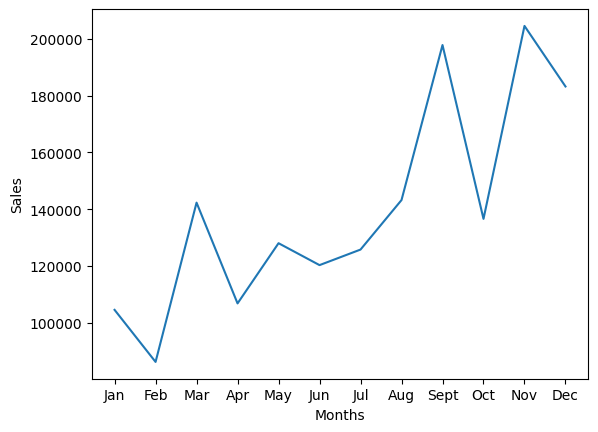

In [36]:
months={
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sept',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}
monthsales = monthsales.rename(index=months)
monthsales
plt.figure()
plt.plot(monthsales.index,monthsales.values)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()


In [37]:
#Which product category generated the highest revenue?
pro_cat = df1.groupby('Category')['Sales'].sum()
pro_cat

Category
Furniture          623288.6057
Office Supplies    539331.1280
Technology         517177.6430
Name: Sales, dtype: float64

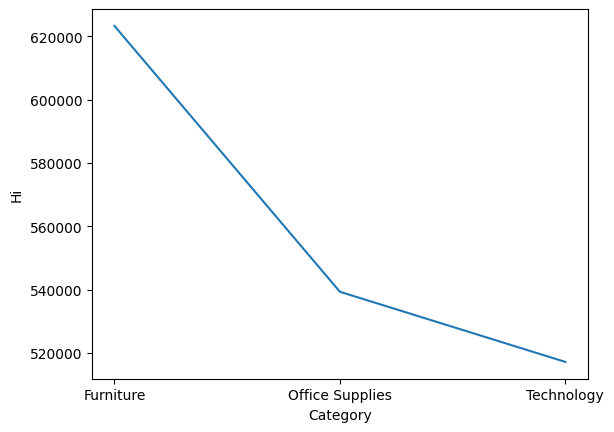

the highest revenue generated by Furniture is 623288.6057


In [38]:
plt.figure()
plt.plot(pro_cat.index,pro_cat.values)
plt.xlabel('Category')
plt.ylabel('Hi')
plt.show()
print(f'the highest revenue generated by {pro_cat.idxmax()} is {max(pro_cat.values)}')

In [39]:
#Identify the top 5 products by sales amount

top5_prods = df.groupby('Product Name')['Sales'].sum()

print(top5_prods)
print('-------------------------------------------------------')
top5_prods = top5_prods.sort_values(ascending=False).head(5)
print(top5_prods)

Product Name
"While you Were Out" Message Book, One Form per Page                                                     25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 41.300
#10 Self-Seal White Envelopes                                                                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 286.672
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     477.660
iOttie HLCRIO102 Car Mount                                                                              215.892
iOttie XL Car Mount                                                                        

In [40]:
for prod in top5_prods.index:
    print(f'{prod}: ${top5_prods[prod]}')

Canon imageCLASS 2200 Advanced Copier: $61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind: $27453.384000000002
Cisco TelePresence System EX90 Videoconferencing Unit: $22638.48
HON 5400 Series Task Chairs for Big and Tall: $21870.576
GBC DocuBind TL300 Electric Binding System: $19823.479


year
2014    345109.4811
2015    365681.6780
2016    440793.9054
2017    528212.3122
Name: Sales, dtype: float64


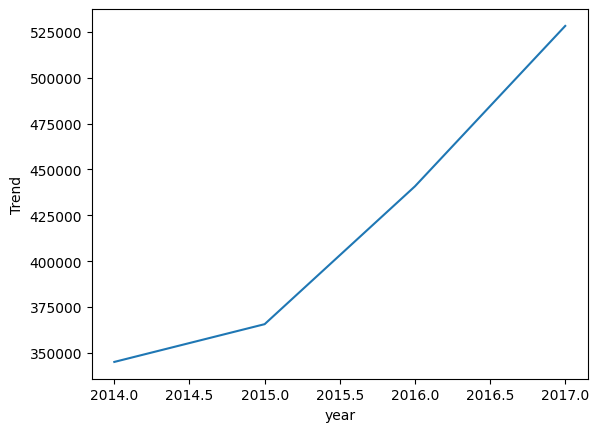

In [41]:
#Visualize the sales trends over the year
trend_sales = df1.groupby('year')['Sales'].sum()
print(trend_sales)
plt.figure()
plt.plot(trend_sales.index,trend_sales.values)
plt.xlabel('year')
plt.ylabel('Trend')
plt.show()